### Boosting Machine

- 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식 #### 노란색 머신러닝교과서 with 파이썬 사이킷런, 텐서플로우 교재의 279쪽에 있음

- 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있음.
- 에이다 부스트는 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘임

- 부스팅은 데이터 자료가 수십만건 이상일때만 사용하는게 좋다.
- 부스팅은 분류와 회귀에 모두 사용가능하다.
- 그라디언트 부스팅을 사용, 하지만 수행 시간 오래 걸리는 단점
- GBM 기반의 ML 패키지에는 XGBoost와 LightGBM이 있다.

## [실습: 사용자 행동 인식 데이터 세트]


- UCI 머신러닝 리포지토리에서 제공하는 사용자 행동 데이터 세트에 대한 예측분류
- 30명에게 스마트폰 센서를 장착한뒤 사람의 동작과 관련된 여러가지 피처를 수집한 데이터임

In [2]:
##### *무조건 살펴보기* ######

# GBM 하이퍼파라미터 튜닝: GridSearchCV 사용
#  - loss:경사하강법에 사용할 비용함수 지정
#  - learning_rage: GBM이 학습을 진행할때마다 적용되는 학습률, 0~1 사이값 지정가능하며 기본값은 1임
#  - n_estimators: weak learner의 개수, weak learner가 순차적으로 오류를 보정하므로
#             개수가 많을수록 에측 성능이 일정 수준까지 좋아질수 있음
#              개수가 많아질수록 시간이 오래걸림. 기본값 100
#  - subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율, 기본값은 1이며
#                전체 학습 데이터를 기반으로 학습한다는 의미임. (0.5이면 학습데이터의 50%)
#                과적합 우려가 있으면 1보다 작은값으로 설정

In [ ]:
# 에이다 부스트 실습은 아래 사이트에서 자료를 다운로드 받아 실습하세요
# https://injo.tistory.com/31  (실습코드)
    

In [ ]:
## 또는 머신러닝 교과서with 파이썬, 사이킷런, 텐서플로 교재(노란색) 279

## [XGBoost(eXtra Gradient Boost]
- 트리기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘중 하나임
- GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합규제(Regularization) 부재 등의 문제를 해결한다.
- 특히 XGBoost는 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 완료할 수 있다.
- 자체적으로 교차검증을 내장하고 있으며 결손값도 자체 처리가능하다.
- C++로 작성된 알고리즘으로
- 파이썬 자체에서 제공하는 xgboost, 사이킷런의 xgboost, 사이킷런과 호환되는 파이썬의 xgboost가 있다.
- 콘다 프롬프트 환경에서 인스톨함
- conda install -c anaconda py-xgboost
- 만약 위의 내용이 안된다면 https://www.lfd.uci.edu/~gohlke/pythonlibs/ 에서 xgboost로 검색하여서 다운로드한뒤
- 작업할 폴더로 이동하고(예: 콘다프롬프트에 나오는 경로가면 쉬움)
갓
- pip install 다운받은 파일이름으로 작업함.

In [ ]:
# 파이썬 xgboost
import xgboost as xgb
print(xgb.__version__)


# 참고 사이킷런은 
# from xgboost import XGBClassifier

In [ ]:
# XGBoost 는 중요도를 봐야 한다.
# 중요도를 볼수 있는 Feature importance , 그래프틑 제공해준다.
# xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
# 옵션값이 많기 때문에 공부해야함.

In [ ]:
# 파이썬의 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행후 최적의 파라미터를 구할수 있는 방법을 cv() API로 제공함.
# params(dict): 부스터 파라미터
# dtrain(Dmatrix): 학습데이터
# num_boost_round(int): 부스팅 반복 횟수
# nfold(int): CV 폴드개수
# stratified(bool): CV수행시 층화 표본 추출(stratified sampling) 수행여부
# metrics(string or list of strings): CV 수행시 모니터링할 성능 평가 지표
# early_stopping_rounds(int): 조기 중단을 화성화시킴. 바복횟수 지정

## [LightGBM]


- Xgboost는 학습시간이 오래걸림(GridSearchCV 하이퍼파라미터 튜닝 시간이 있음)
- LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적음.
- 메모리 사용량도 적음
- 단 적은 데이터셋(일반적으로 10000건)에 사용할 경우 과적합이 일어날수 잇음.
- lightGBM은 균형트리를 생성하지 않아 속도가 빠름, 리프노드를 지속적으로 분할하면서
- 트리의 깊이는 깊어지고 비대칭적인 규칙 트리가 생성됨.
- 터미널에서 설치
  - conda install -c conda-forge lightgbm

# PUBG - Detailed EDA, TOP 10% players and XGB model

- https://www.kaggle.com/code/datark1/pubg-detailed-eda-top-10-players-and-xgb-model/notebook

In [7]:
import numpy as np                    # linear algebra
import pandas as pd                   # database manipulation
import matplotlib.pyplot as plt       # plotting libraries
import seaborn as sns                 # nice graphs and plots
import warnings                       # libraries to deal with warnings
warnings.filterwarnings("ignore")

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.4.3
numpy version: 1.23.0
seaborn version: 0.11.2


In [9]:
train = pd.read_csv('train_V2.csv')

print('There are {:,} rows and {} columns in our dataset.'.format(train.shape[0],train.shape[1]))

There are 4,446,966 rows and 29 columns in our dataset.


In [10]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

#### For better understanding of database below there is a columns descriptions:

- groupId - Players team ID
- matchId - Match ID
- assists - Number of assisted kills. The killed is actually scored for the another teammate.
- boosts - Number of boost items used by a player. These are for example: energy dring, painkillers, adrenaline syringe.
- damageDealt - Damage dealt to the enemy
- DBNOs - Down But No Out - when you lose all your HP but you're not killed yet. All you can do is only to crawl.
- headshotKills - Number of enemies killed with a headshot
- heals - Number of healing items used by a player. These are for example: bandages, first-aid kits
- killPlace - Ranking in a match based on kills.
- killPoints - Ranking in a match based on kills points.
- kills - Number of enemy players killed.
- killStreaks - Max number of enemy players killed in a short amount of time.
- longestKill - Longest distance between player and killed enemy.
- matchDuration - Duration of a mach in seconds.
- matchType - Type of match. There are three main modes: Solo, Duo or Squad. In this dataset however we have much more categories.
- maxPlace - The worst place we in the match.
- numGroups - Number of groups (teams) in the match.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills from a car, bike, boat, etc.
- swimDistance - Total distance traveled by swimming (in meters).
- teamKills - Number teammate kills (due to friendly fire).
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured (in meters).
- weaponsAcquired - Number of weapons picked up.
- winPoints - Ranking in a match based on won matches.
- And our target column:

- winPlacePerc - Normalised placement (rank). The 1st place is 1 and the last one is 0.

In [12]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [13]:
missing_data = train.isna().sum().to_frame()
missing_data.columns=["Missing data"]

In [14]:
no_matches = train.loc[:,"matchId"].nunique()
print("There are {} matches registered in our database.".format(no_matches))

There are 47965 matches registered in our database.


In [15]:
m_types = train.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536762
4,duo,313591
5,solo,181943
6,normal-squad-fpp,17174
7,crashfpp,6287
8,normal-duo-fpp,5489
9,flaretpp,2505


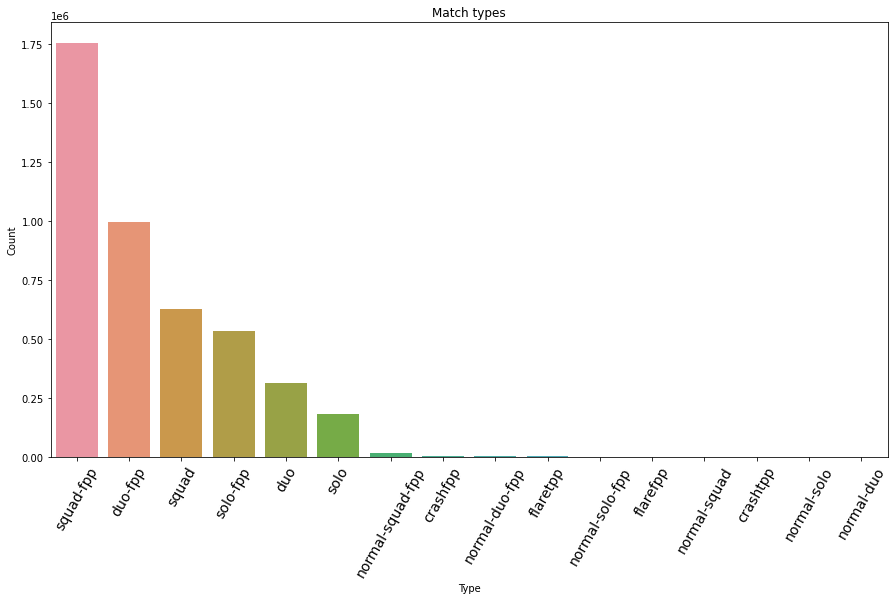

In [16]:
plt.figure(figsize=(15,8))
ticks = m_types.Type.values
ax = sns.barplot(x="Type", y="Count", data=m_types)
ax.set_xticklabels(ticks, rotation=60, fontsize=14)
ax.set_title("Match types")
plt.show()

In [20]:
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [18]:
!pip install cmake

In [19]:
!pip3 install xgboost

In [21]:
train.dropna(subset=["winPlacePerc"], inplace=True) # droping rows with missing labels

X = train.drop(["Id","groupId","matchId","matchType","winPlacePerc"], axis=1)
y = train["winPlacePerc"]

col_names = X.columns

transformer = Normalizer().fit(X)
X = transformer.transform(X)

In [22]:
X = pd.DataFrame(X, columns=col_names)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [24]:
param = {
    'eta': 0.15, 
    'max_depth': 5,  
    'num_class': 2} 

steps = 20  # The number of training iterations
model = xgb.train(param, D_train, steps)

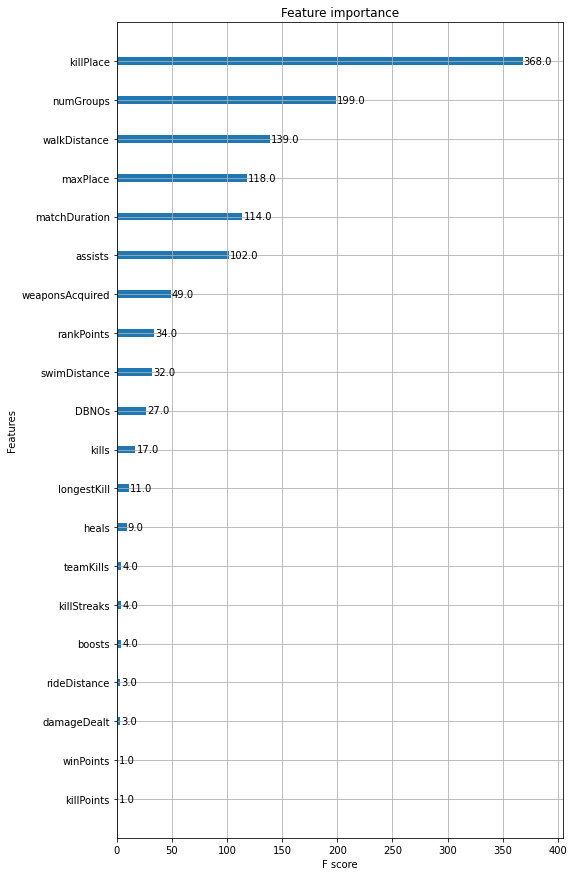

In [25]:
fig, ax1 = plt.subplots(figsize=(8,15))
xgb.plot_importance(model, ax=ax1)
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("MSE = {}".format(mean_squared_error(Y_test, best_preds)))

MSE = 0.3182114276433815
